<a href="https://colab.research.google.com/github/Samanyu-T/Visualizing-Machine-Learning/blob/main/Basics_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import linear_model
import seaborn as sns
import pandas as pd



# What is Regression?
Regression involves finding a continuous relationship between an independent variable $X$ and the dependent variable $Y$. 

For example let a model be defined by:

\begin{equation}
\hat{Y_i} = f(X_i, w) + e_i
\end{equation}

Where $w$ are the parameters of the model we are trying to learn and $e_i$ 
indicates the noise of the process.
<br><br>

In Linear Regression we make the assumption that $f$ is a linear and so we can simplify the general expression to the following: 

\begin{equation}
\hat{Y_i} = w^T\phi(X_i) + e_i = w_1\phi_1 + w_2\phi_2 + ... w_n\phi_n + e_i
\end{equation}
<br>


Where $\phi$ is a feature vector, we are free to choose the features when we design the model. An example would be a polynomial features, in this case $\phi$ would be : $\phi = [1, x, x^2 ... x^n]$, other examples would be sinusoids (think of Fourier Series), gaussians etc. The number of features $n$ is also a  hyper-parameter and a poor choice can result in overfitting - more on that later.

#How do we train our model?
In a regression model we try to find the $w$ (weights), which **minimize** a loss function. Now the question is how do we define the loss function?
<br><br>
Well there is no simple answer as this is the heart of machine learning, by coming up with different loss functions we can change our model. 

A widely used loss is simply the least squares, which adds up the difference between our prediction and the true data point.

\begin{equation}
L = \sum_{i=1}^N{(w^Tx_i - y_i)^2} 
\end{equation}

\begin{equation}
w^* = \text{argmin}_w(L(w,D))
\end{equation}

So the weight vector we choose will be such that it minimizes this loss for our data $D$. The minimization can be done analytically using calculus or more generally using gradient descent methods. 

The minimization is the part of machine learning which is so computationally intensive, and so any optimizations or simplifications we can make during this step would be great. 


Now lets see how well it works !!

In [ ]:
#@title
#Evaluate Functions for a given function and x
def Basis(func, x, i):
  
  if func == 'Poly':
    return x**i

  elif func == 'Sine':
    return np.sin(i*x)

In [ ]:
#@title
#Randomly make a model with some noise
def Model(func, x, n, w, noise):

    #Ininitialise the phi matix
    phi = np.zeros( (n, len(x)) )

    #Evaluate the phi matrix for a given Basis
    for i in range (n):
      phi[i] = Basis(func, x, i)

    #Add the noise to the model to find the data points
    y = w@phi + np.random.normal(0,noise, len(x))

    #Now Return the Modelled Data and True Weights
    return y

In [ ]:
#@title
#Estimate the weight vector using sklearn for a given basis and complexity
def EstimateWeights(x, y, func, n, alpha):

    #Ininitialise the phi matix
    phi = np.zeros( (n, len(x)) )
    
    #Evaluate the phi matrix for a given Basis
    for i in range(n):
      phi[i] = Basis(func, x, i)

    phi = np.transpose(phi)

    #Use the sklearn module to fit the data using the Various Methods
    w_ols = linear_model.LinearRegression()
    w_ols.fit(phi, y)

    w_l2 = linear_model.Ridge(alpha = alpha)
    w_l2.fit(phi,y)

    w_l1 = linear_model.Lasso(alpha = alpha)
    w_l1.fit(phi,y)

    return [w_ols, w_l2, w_l1]

In [ ]:
#@title

def Prediction_Linear_Reg(data_params, hyper_params):
  ''' These are the parameters we can control - so by changing these we can find ways to visualize 
  these methods '''
  #Initialise the x-vector
  x_data = np.linspace(0,1,data_params['N'])

  #Initialize a dictionary to store the data
  data = {}

  ''' End of Initialization'''

  #Evaluate the true model
  y_data = Model(hyper_params['func'], x_data,  data_params['true_order'], data_params['w_true'], data_params['noise']) 

  #Now loop through various complexities and plot their estimates
  n_plot = 200 
  x_plot = np.linspace(-data_params['extrapolation_range'],1 + data_params['extrapolation_range'], n_plot)
  data['x'] = x_plot


  for i in range(hyper_params['order_min'],hyper_params['order_max']):
      #Ininitialise the phi matix
      phi_plot = np.zeros( (i, len(x_plot)) )

      #Evaluate the phi matrix for a given Basis
      for j in range(i):
        phi_plot[j] = Basis(hyper_params['func'], x_plot, j)

      [w_ols, w_l2, w_l1] = EstimateWeights(x_data,y_data, hyper_params['func'] ,i, hyper_params['alpha'])

      y_ols = w_ols.predict(np.transpose(phi_plot))
      y_l1 = w_l1.predict(np.transpose(phi_plot))
      y_l2 = w_l2.predict(np.transpose(phi_plot))

      #Store all the different data - you can split this up into data_ols, data_l1 etc. to plot them seperately 
      data[str(i) + ' ols'] = y_ols
      data[str(i) + ' L1'] = y_l1
      data[str(i) + ' L2'] = y_l2

  #Create a table of the data - print(df) to see what its doing
  df= pd.DataFrame.from_dict(data)

  #Convert this into a long table again - print(df) to see what its doing
  dfm = df.melt('x', var_name='Type', value_name='y')
  return dfm, x_data, y_data 

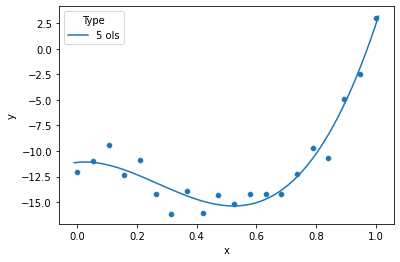

In [ ]:
#@title
data_params = {}
hyper_params = {}
#Number of data points
data_params['N'] = 20

#Initialise the amount of Noise
data_params['noise'] = 1

#Initialise the Basis
hyper_params['func'] = 'Poly'

#Model Order and Trial Order
data_params['true_order'] = 5
order = 5
hyper_params['order_min'] = order
hyper_params['order_max'] = order + 1

#Randomly initialise a true weight vector
data_params['w_true'] = np.array( [-10.18936858, -10.16872548, -17.06492541,  27.73698441 , 11.97203305])

#Regularization 
hyper_params['alpha'] = 0.01
data_params['extrapolation_range'] = 0.01

dfm,x_data, y_data = Prediction_Linear_Reg(data_params, hyper_params)

#Plot the data points
sns.scatterplot(x = x_data, y = y_data);
sns.lineplot(x="x", y="y", hue='Type', data=dfm[ dfm['Type'] == str(order) + ' ols'  ]  );

If we know the order of the model, i.e how many terms are in the basis - $\phi$, a normal least squares loss function works perfectly fine.

But this is not always the case, most of the time we don't know what the basis should be. If we end up choosing the order of our basis to be too high we can end up **overfitting** and if we choose too low we end up **underfitting**.

Almost all the time we end up overfitting, as we aim to choose a model which can generalise well so we want to choose a reasonably large order. So how does the least squares method perform when the order of choice is much larger than the true order. 



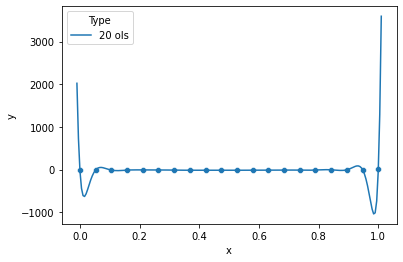

In [ ]:
#@title
order = 20
hyper_params['order_min'] = order
hyper_params['order_max'] = order + 1
dfm,x_data, y_data = Prediction_Linear_Reg(data_params, hyper_params)

#Plot the data points
sns.scatterplot(x = x_data, y = y_data);
sns.lineplot(x="x", y="y", hue='Type', data=dfm[ dfm['Type'] == str(order) + ' ols'  ]  );

Not very well at all, the model is now learning the noise of the data and is terrible at extrapolating. So we need to make some changes. 

#Regularization

One thing we can do to prevent this is to use a factor in our loss function which scales with the number of model parameters we have.

A classic example is the L2 Loss:
\begin{equation}
L = \sum_{i=1}^N{(w^Tx_i - y_i)^2} + \alpha \sum_{j=1}^{n}{w_j^2}
\end{equation}

Another one is the L1 loss (LASSO):
\begin{equation}
L = \sum_{i=1}^N{(w^Tx_i - y_i)^2} + \alpha \sum_{j=1}^{n}{|w_j|}
\end{equation}

In general L1 encourages sparsity and so can result in more simpler and better models but minimizing it is much more difficult than with L2, so for more larger datasets L2 is normally better.

Here $λ$ is known as a hyperparameter and we can choose its value - often we do an optimization to find the best $λ$.

This loss penalizes many values of $w$ and thus forces our model to be as simple as possible whilst still explaining the majority of the model.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e-01, tolerance: 4.898e-02
  model = cd_fast.enet_coordinate_descent(


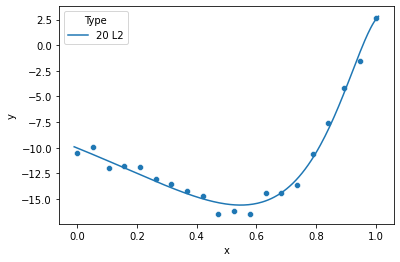

In [ ]:
#@title
order = 20
hyper_params['order_min'] = order
hyper_params['order_max'] = order + 1
dfm,x_data, y_data = Prediction_Linear_Reg(data_params, hyper_params)

#Plot the data points
sns.scatterplot(x = x_data, y = y_data);
sns.lineplot(x="x", y="y", hue='Type', data=dfm[ dfm['Type'] == str(order) + ' L2'  ]  );

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.377e-02, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(


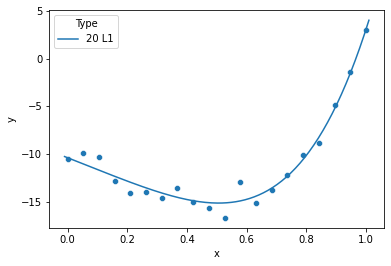

In [ ]:
#@title
order = 20
hyper_params['order_min'] = order
hyper_params['order_max'] = order + 1
dfm,x_data, y_data = Prediction_Linear_Reg(data_params, hyper_params)

#Plot the data points
sns.scatterplot(x = x_data, y = y_data);
sns.lineplot(x="x", y="y", hue='Type', data=dfm[ dfm['Type'] == str(order) + ' L1'  ]  );

Great !! Now our model still does well even when we chose our model order to be too high. But we still need to select the right $\alpha$ - the regularization hyperparameter

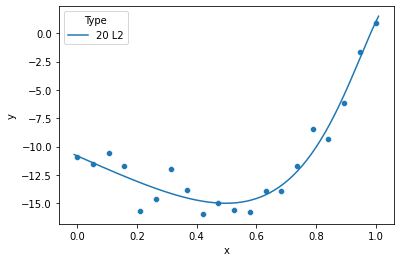

In [ ]:
#@title
alpha = 100
order = 20
dfm,x_data, y_data = Prediction_Linear_Reg(data_params, hyper_params)

#Plot the data points
sns.scatterplot(x = x_data, y = y_data);
sns.lineplot(x="x", y="y", hue='Type', data=dfm[ dfm['Type'] == str(order) + ' L2'  ]  );

Because hoosing an $\alpha$ which is too high results in underfitting and too low results in overfitting (the regularization is negligable and we return to least squares)

#Hyperparameter Tuning
Another key part of machine learning, and is used in almost all cases. It goes as follows


1.   Split up the data into training and test data, a widely used split is 80% training and 20% testing
2.   Train the model on the training data
3. Evaluate the accuracy of the model on the testing data set
4. Choose the hyperparameter which has the best accuracy for the test set.

Finding the correct hyperparameter is not trivial, a simple method would be to do a grid search and then choose the best point on the grid.



In [ ]:
#@title
from sklearn import metrics
import matplotlib.pyplot as plt

alpha = np.logspace(-4,1,100)
error_l1 = np.zeros(len(alpha))
error_l2 = np.zeros(len(alpha))

x_train = x_data[:15]
y_train = y_data[:15]

x_test = x_data[-5:]
y_test = y_data[-5:]

phi_test = np.zeros( (order, len(x_test)) )

#Evaluate the phi matrix for a given Basis
for j in range(order):
  phi_test[j] = Basis(hyper_params['func'], x_test, j)

for i in range(len(alpha)):
  [w_ols, w_l2, w_l1] = EstimateWeights(x_train, y_train, hyper_params['func'], order, alpha[i])
  y_l1 = w_l1.predict(np.transpose(phi_test))
  y_l2 = w_l2.predict(np.transpose(phi_test))
  error_l1[i] = metrics.mean_squared_error(y_test,y_l1)
  error_l2[i] = metrics.mean_squared_error(y_test,y_l2)

Optimal Value of alpha is: 0.05994842503189409


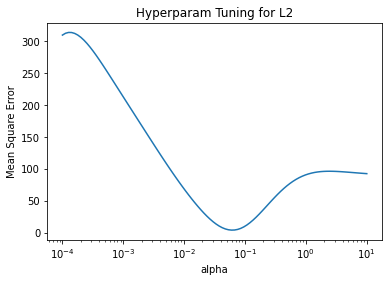

In [ ]:
#@title
plt.xscale('log')
plt.title('Hyperparam Tuning for L2')
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.plot(alpha, error_l2);
print('Optimal Value of alpha is: ' + str(alpha[np.argmin(error_l2)]))

Optimal Value of alpha is: 0.004641588833612782


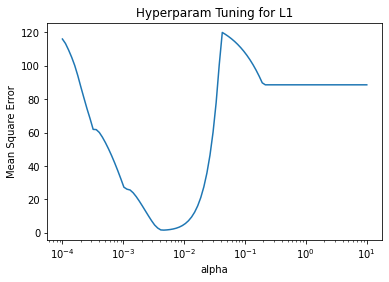

In [ ]:
#@title
plt.xscale('log')
plt.title('Hyperparam Tuning for L1')

plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.plot(alpha, error_l1);
print('Optimal Value of alpha is: ' + str(alpha[np.argmin(error_l1)]))

#Kernels
When we have a multidimensional input writing a feature vecotr $\phi$ can become very difficult - we have to consider all the options i.e for a polynomial feature $\phi = [1 , x_1, x_2 ,x_1x_2 ,x_1^2 ,x_2^2]$. We can make our lives easier and even use an 'infinitely long (RBF)' feature vector by using kernels.

In effect a kernel is a clever and simple way to write a complicated feature vector.

https://www.cs.toronto.edu/~duvenaud/cookbook/
